In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data = pd.read_csv('C:/Users/neeraj/Desktop/Breast_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
## check null entries
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
## remove duplicate entries
data.drop_duplicates(inplace = True)
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


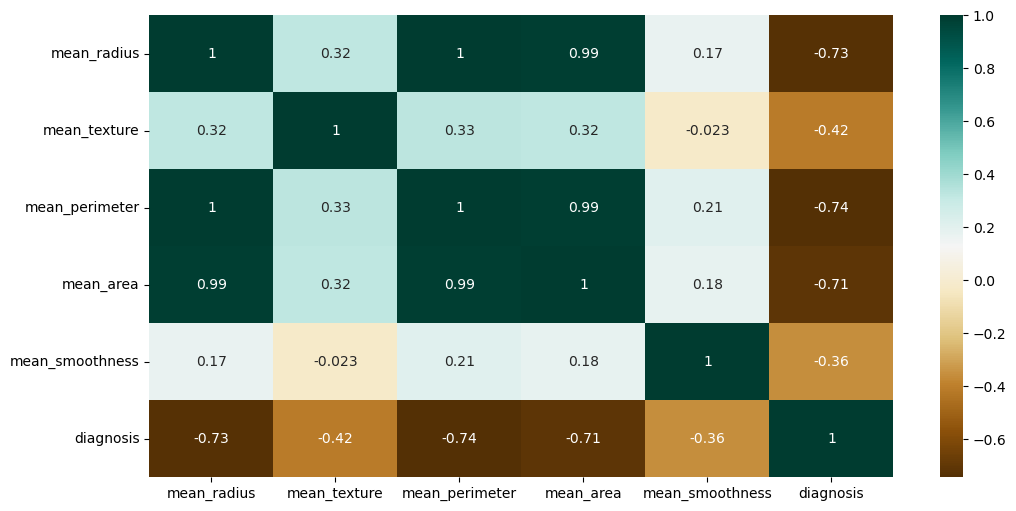

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(), annot=True, cmap = 'BrBG')
plt.show()

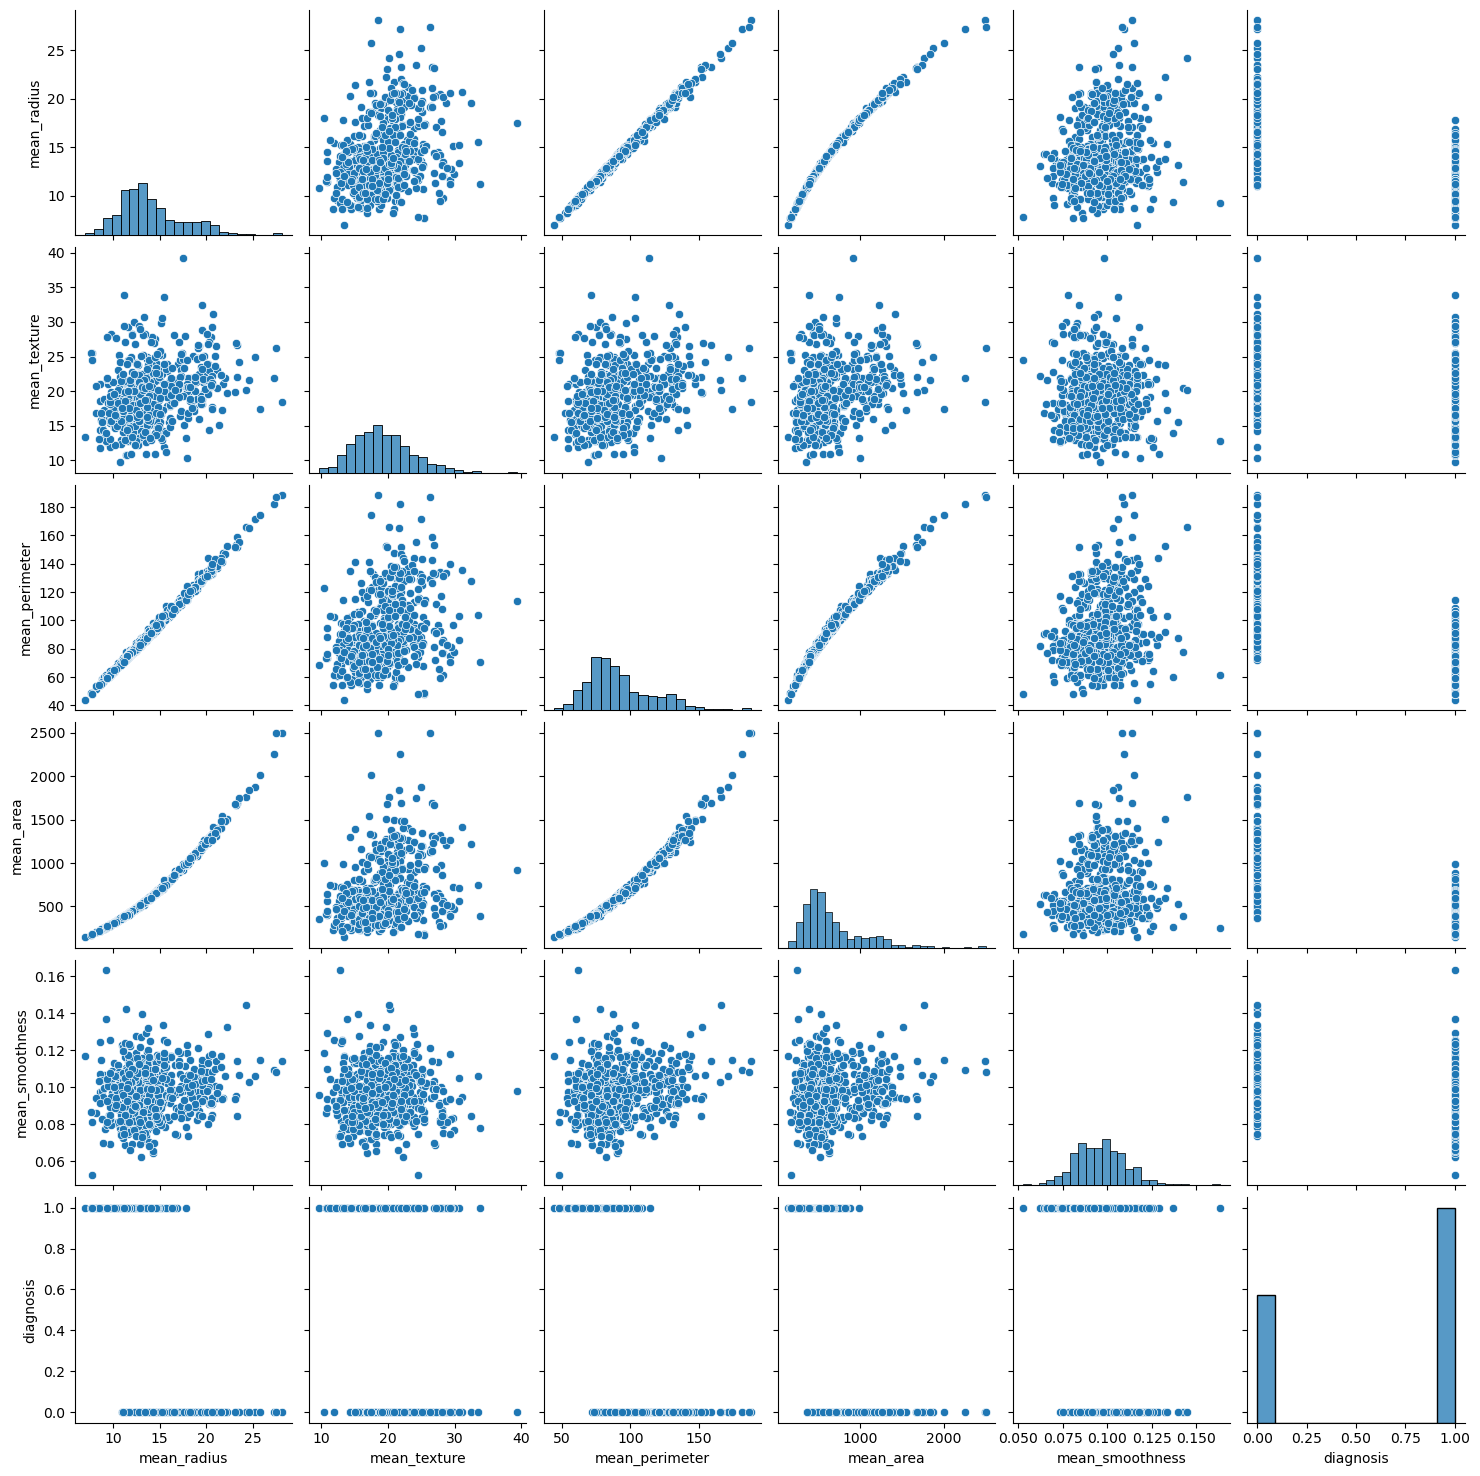

In [8]:
sns.pairplot(data)
plt.show()

In [9]:
data1 = data.drop(columns = ['mean_perimeter', 'mean_area'], axis = 1)
data1

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


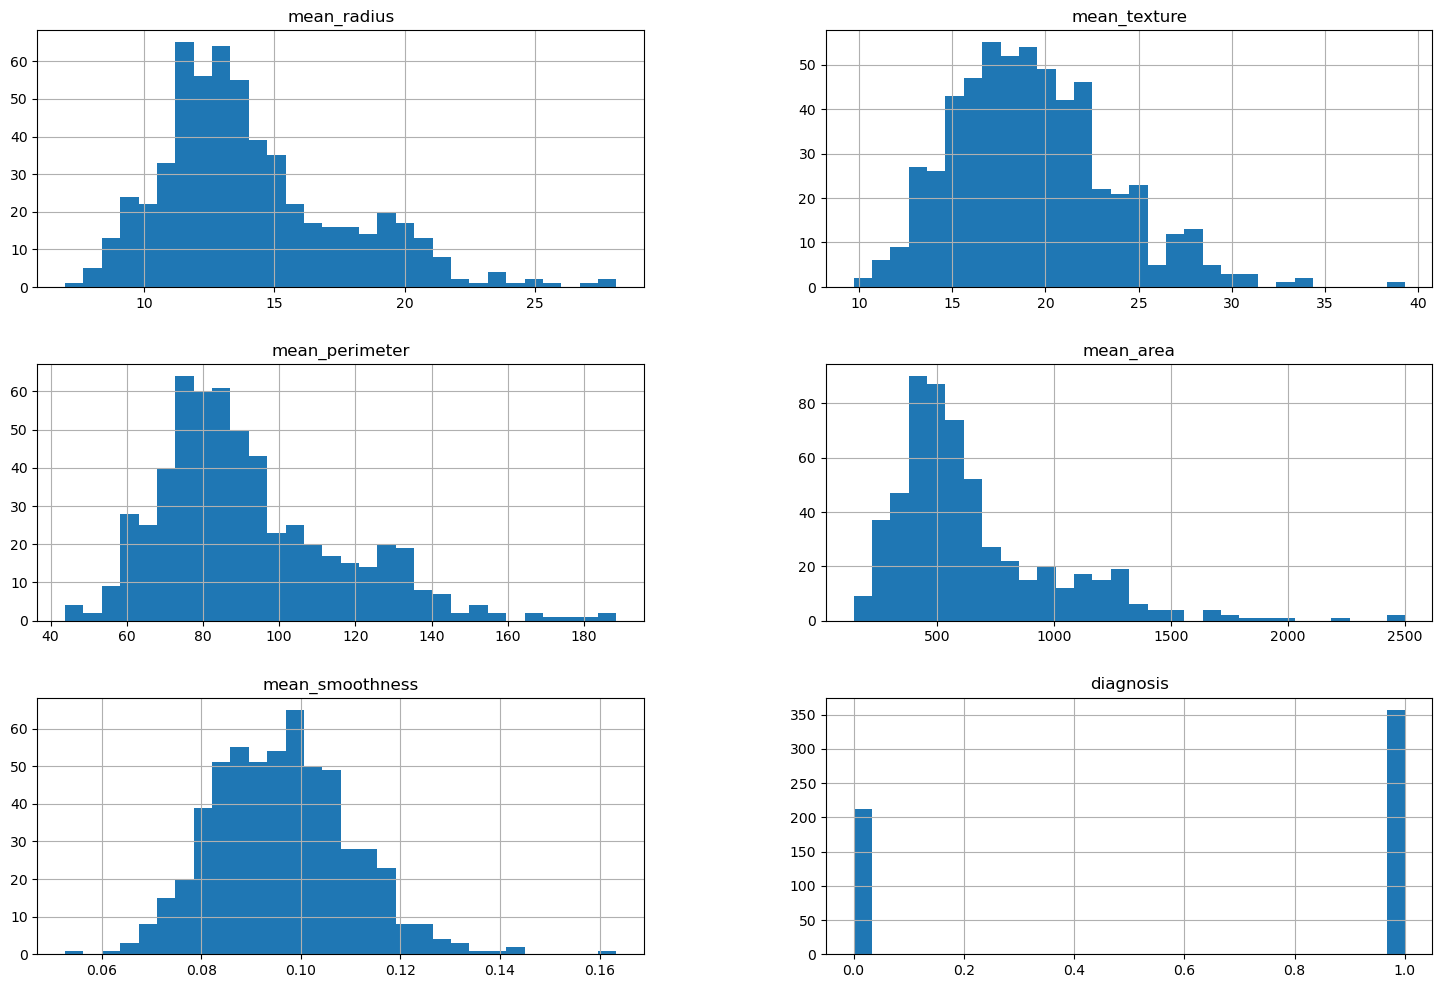

CPU times: total: 781 ms
Wall time: 792 ms


In [10]:
%%time
data.hist(bins=30, figsize=(18,12))
plt.show()

In [11]:
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(455, 3)

In [13]:
X_test.shape

(114, 3)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[42  5]
 [ 5 62]]
0.9122807017543859


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[38  9]
 [ 4 63]]
0.8859649122807017


In [18]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred = svm.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[42  5]
 [ 5 62]]
0.9122807017543859


In [20]:
from sklearn.svm import SVC
kernel_svm = SVC(kernel = 'rbf')
kernel_svm.fit(X_train, y_train)

SVC()

In [21]:
y_pred = kernel_svm.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[41  6]
 [ 6 61]]
0.8947368421052632


In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[39  8]
 [ 2 65]]
0.9122807017543859


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[42  5]
 [ 6 61]]
0.9035087719298246


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [27]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[42  5]
 [ 4 63]]
0.9210526315789473


In [28]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [29]:
## compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
deep_history = model.fit(X_train, 
                              y_train, 
                              epochs=100,
                              batch_size = 32,
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop]
                            )

Epoch 1/100
15/15 [==============================] - 1s 12ms/step - loss: 0.5898 - accuracy: 0.7451 - val_loss: 0.5478 - val_accuracy: 0.8596
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7407 - val_loss: 0.5317 - val_accuracy: 0.8596
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7407 - val_loss: 0.5155 - val_accuracy: 0.8596
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7582 - val_loss: 0.5002 - val_accuracy: 0.8596
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7473 - val_loss: 0.4856 - val_accuracy: 0.8596
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7670 - val_loss: 0.4717 - val_accuracy: 0.8684
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7758 - val_loss: 0.4563 - val_accuracy: 0.8684
Epoch 8/100


<Figure size 800x600 with 0 Axes>

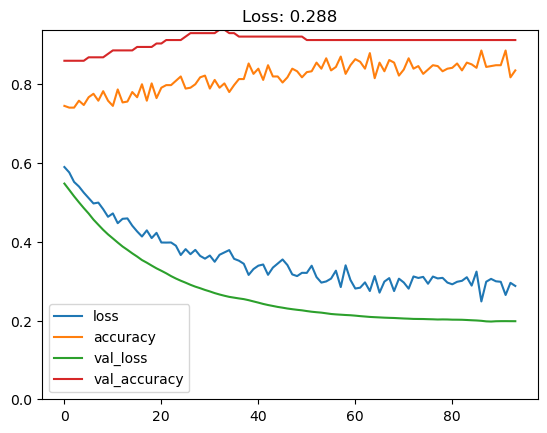

In [30]:
def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
plot_loss(deep_history)

In [31]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [33]:
df = pd.DataFrame({
    'Model Name': ['Logistic Regression', 'K Neighbors Classifier', 'Linear SVM', 'Kernal SVM', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier', 'ANN'],
    'Accuracy Score':  [91.22, 88.59, 91.22, 89.47, 91.22, 90.35, 89.47, 93.85]
})
df

,Model Name,Accuracy Score
0,Logistic Regression,91.22
1,K Neighbors Classifier,88.59
2,Linear SVM,91.22
3,Kernal SVM,89.47
4,Naive Bayes,91.22
5,Decision Tree Classifier,90.35
6,Random Forest Classifier,89.47
7,ANN,93.85


In [34]:
df = df.sort_values(by = ['Accuracy Score'], ascending = False)
df

,Model Name,Accuracy Score
7,ANN,93.85
0,Logistic Regression,91.22
2,Linear SVM,91.22
4,Naive Bayes,91.22
5,Decision Tree Classifier,90.35
3,Kernal SVM,89.47
6,Random Forest Classifier,89.47
1,K Neighbors Classifier,88.59
